<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 3 Project: What is the actual average laptop price?**



#**Loading all neccessary libraries:**

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 28.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [3]:
import preliz as pz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

Woah wow so cool, librariesss.

Notes for continuing this project: *FIND A GOOD PPC FIT, IF YOU CAN. IF YOU DO FIND ONE, THINK: "DOES THIS REFLECT REALITY?"*

#**Plotting the dataset!**
This is the section where we get the dataset imported from Github to Colab. Also, this is where I plot the entire dataset and then the price (the section we really need from this dataset.)

In [5]:
#loading the dataset from Github, dataset from Kaggle
url_laptops = 'https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/Laptop-Price.csv'
#Reads the csv file v
data_laptops = pd.read_csv(url_laptops)

In [6]:
#Models the entirety of the dataset of laptops (1145 laptops)
data_laptops

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


We do not need all the data from this dataset from Kaggle. We just need the prices and convert them to USD, to make it easier.

In [7]:
#Showcases all the Euro prices of laptops in this dataset
Price1 = data_laptops.Price_euros
Price1

,Price_euros
0,575.00
1,400.00
2,1495.00
3,770.00
4,393.90
...,...
1141,805.99
1142,720.32
1143,638.00
1144,1499.00


Cool! We got the prices for the laptops. Now, we just need to convert to USD.

In [11]:
#as of today: Oct. 2, 2024, the current exchange rate from Euros to USD is 1.1.
exchange_rate = 1.10
#defining price in usd to be price_euros multiplied by the exchange rate
data_laptops['Price_usd'] = data_laptops['Price_euros'] * exchange_rate

In [12]:
Price2 = data_laptops.Price_usd
Price2

,Price_usd
0,632.500
1,440.000
2,1644.500
3,847.000
4,433.290
...,...
1141,886.589
1142,792.352
1143,701.800
1144,1648.900


Nice! Manipulating the dataset to get USD price instead of Euros gives me, a fellow American, a better way to look at this instead of Euros. Sorry EU countries.

#**Priors:**
Plotting our histograms of our raw data + determining and plotting our priors!

Before we start with our priors, let's plot histograms of our raw data.

(array([414., 397., 206.,  82.,  36.,   5.,   3.,   1.,   1.,   1.]),
 array([ 265. ,  848.4, 1431.8, 2015.2, 2598.6, 3182. , 3765.4, 4348.8,
        4932.2, 5515.6, 6099. ]),
 <BarContainer object of 10 artists>)

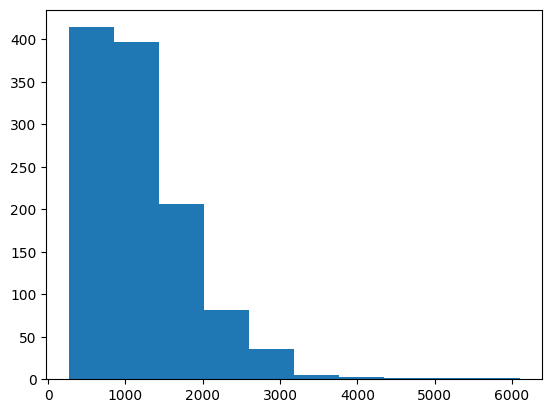

In [17]:
#plotting histogram of the Euro prices
plt.hist(Price1)

**Note:**

We can see that the histogram is really skewed right. This makes sense since a lot of the data of our laptops are between the prices of ~ €300/400 to €1500, which is reasonable for a laptop price.

I'll plot the Price2 Histogram (Prices in USD) as well, but they should match up together well. "Match up together well." - I basically mean the exact same.

(array([414., 397., 206.,  82.,  36.,   5.,   3.,   1.,   1.,   1.]),
 array([ 291.5 ,  933.24, 1574.98, 2216.72, 2858.46, 3500.2 , 4141.94,
        4783.68, 5425.42, 6067.16, 6708.9 ]),
 <BarContainer object of 10 artists>)

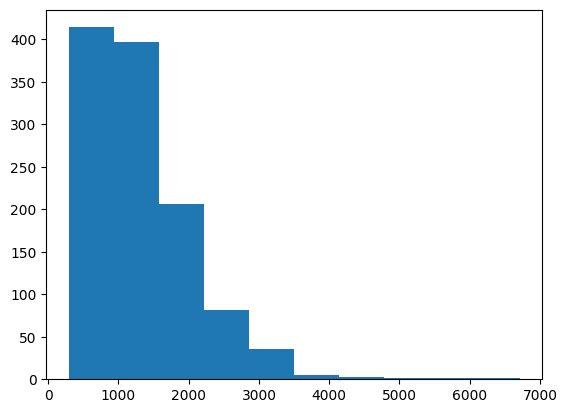

In [13]:
#plotting histogram of the USD prices
plt.hist(Price2)